<a href="https://colab.research.google.com/github/enidroman/Enid-Roman-Python-201-Project-3/blob/main/Enid_Roman_Python_201_Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install --upgrade pip
! pip uninstall pandas-profiling
! pip install pandas-profiling

     |████████████████████████████████| 1.6 MB 14.0 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
Found existing installation: pandas-profiling 1.4.1
Uninstalling pandas-profiling-1.4.1:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/pandas_profiling-1.4.1.dist-info/*
    /usr/local/lib/python3.7/dist-packages/pandas_profiling/*
Proceed (Y/n)? y
  Successfully uninstalled pandas-profiling-1.4.1
distutils: /usr/local/lib/python3.7/dist-packages
sysconfig: /usr/lib/python3.7/site-packages
distutils: /usr/local/lib/python3.7/dist-packages
sysconfig: /usr/lib/python3.7/site-packages
distutils: /usr/local/include/python3.7/UNKNOWN
sysconfig: /usr/include/python3.7m/UNKNOWN
distutils: /usr/local/bin
sysconfig: /usr/bin
distutils: /usr/local
sysconfig: /usr
user = False
home = None
root = None
prefix = None
     |████████████████████████████████| 248 kB 14.9 MB/s 
     |█████████

In [2]:
import pandas_profiling as pp

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
%matplotlib inline

### **NYPD Shooting Incident Data (Historic)**

I did an observation of how many rows and columns this particular dataset contains with dataframe.head. This dataset has 23568 rows and 19 columns.

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/enidroman/Enid-Roman-Python-201-Project-3/main/NYPD%20Shooting%20Incident%20Data%20(Historic).csv')


df.shape

(23568, 19)

I did a Profile Report to get a complete information on the data set. I saw Shiana Rodriguez use this on another project and found it very interesting and very useful since df.hist gave me an error message with this data set. With her permission I used it with this dataset. I had to install the new version of pandas profiling with the help of the turtor. For some reason in order for the report to run I need to run the installation everytime I open this notebook. This report gave me a exploratory data analysis with just a few lines of codes. I was able to use this report for my data cleaning and analysis.

In [5]:
profile = pp.ProfileReport(df)
profile.to_notebook_iframe()


Summarize dataset:   0%|          | 0/32 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

I did a df.head to see the first five rows and the last five rows. To inspect the columns and rows. I observed that cleaning had to be done with removing unnecessary columns and had to make some NAN replacements. 

In [6]:
df.head(23568)

INCIDENT_KEY  ...                                        Lon_Lat
0         201575314  ...  POINT (-73.80814071699996 40.697805308000056)
1         205748546  ...   POINT (-73.91857061799993 40.81869973000005)
2         193118596  ...  POINT (-73.94547965999999 40.791916091000076)
3         204192600  ...   POINT (-74.16610830199996 40.63806398200006)
4         201483468  ...   POINT (-73.91333944399999 40.85454734900003)
...             ...  ...                                            ...
23563     216936948  ...  POINT (-73.91697825799997 40.681842679000056)
23564     214926175  ...   POINT (-73.92143424399995 40.82906028200006)
23565     220870730  ...  POINT (-73.77590919399995 40.680048726000045)
23566     208187330  ...   POINT (-73.90223237399994 40.66674580000005)
23567     220848244  ...   POINT (-73.94514161199999 40.64116269600004)

[23568 rows x 19 columns]

I did a df.columns to see the names of the columns. I observed that I needed to remove some of the unnecessary columns that I did need. 

FYI: JURISDICTION_CODE	is Jurisdiction where the shooting incident occurred. Jurisdiction codes 0(Patrol), 1(Transit) and 2(Housing) represent NYPD whilst codes 3 and more represent non NYPD jurisdictions.

STATISTICAL_MURDER_FLAG is Shooting resulted in the victim’s death which would be counted as a murder.


In [7]:
df.columns

Index(['INCIDENT_KEY', 'OCCUR_DATE', 'OCCUR_TIME', 'BORO', 'PRECINCT',
       'JURISDICTION_CODE', 'LOCATION_DESC', 'STATISTICAL_MURDER_FLAG',
       'PERP_AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'VIC_AGE_GROUP', 'VIC_SEX',
       'VIC_RACE', 'X_COORD_CD', 'Y_COORD_CD', 'Latitude', 'Longitude',
       'Lon_Lat'],
      dtype='object')

I dropped 5 columns by using the drop_cols. I didn't think these columns were necessary for my analysis.

In [8]:
drop_cols=['X_COORD_CD', 'Y_COORD_CD', 'Latitude', 'Longitude', 'Lon_Lat']
df.drop(drop_cols, inplace = True, axis=1)
df.head()

INCIDENT_KEY  OCCUR_DATE OCCUR_TIME  ... VIC_AGE_GROUP  VIC_SEX        VIC_RACE
0     201575314   8/23/2019   22:10:00  ...         25-44        M           BLACK
1     205748546  11/27/2019   15:54:00  ...         25-44        F           BLACK
2     193118596    2/2/2019   19:40:00  ...         18-24        M  BLACK HISPANIC
3     204192600  10/24/2019    0:52:00  ...         25-44        F           BLACK
4     201483468   8/22/2019   18:03:00  ...         18-24        M           BLACK

[5 rows x 14 columns]

I then replace missing values "NaN" with "Unknown" in column "LOCATION_DESC", "Unknown" in column "PERP_AGE_GROUP", "Unknown" in column "PERP_SEX", and "Unknown" in column "PERP_RACE". I did a df.head(23568) to verify the replacement occured.

In [9]:
missing_values =["NaN"]
replace = df['LOCATION_DESC'].replace()
df['LOCATION_DESC'].fillna("UNKNOWN", inplace=True)
replace = df['PERP_AGE_GROUP'].replace()
df['PERP_AGE_GROUP'].fillna("UNKNOWN", inplace=True)
replace = df['PERP_SEX'].replace()
df['PERP_SEX'].fillna("UNKNOWN", inplace=True)
replace = df['PERP_RACE'].replace()
df['PERP_RACE'].fillna("UNKNOWN", inplace=True)


df.head(23568)

INCIDENT_KEY  OCCUR_DATE  ... VIC_SEX        VIC_RACE
0         201575314   8/23/2019  ...       M           BLACK
1         205748546  11/27/2019  ...       F           BLACK
2         193118596    2/2/2019  ...       M  BLACK HISPANIC
3         204192600  10/24/2019  ...       F           BLACK
4         201483468   8/22/2019  ...       M           BLACK
...             ...         ...  ...     ...             ...
23563     216936948   8/21/2020  ...       M  BLACK HISPANIC
23564     214926175    7/3/2020  ...       M           BLACK
23565     220870730  11/21/2020  ...       M           WHITE
23566     208187330   1/18/2020  ...       M           BLACK
23567     220848244  11/21/2020  ...       M           BLACK

[23568 rows x 14 columns]

I had noticed in the previously profile report analysis that there was other values instead of the age group in 'PERP_AGE_GROUP'. I invesitgated and found out that is was "1020", "224", "940". I replaced them individually with 'UNKNOWN'.

In [10]:
df['PERP_AGE_GROUP'] = df['PERP_AGE_GROUP'].replace(['1020'], ['UNKNOWN'])

df.head(1411)

INCIDENT_KEY  OCCUR_DATE OCCUR_TIME  ... VIC_AGE_GROUP  VIC_SEX        VIC_RACE
0        201575314   8/23/2019   22:10:00  ...         25-44        M           BLACK
1        205748546  11/27/2019   15:54:00  ...         25-44        F           BLACK
2        193118596    2/2/2019   19:40:00  ...         18-24        M  BLACK HISPANIC
3        204192600  10/24/2019    0:52:00  ...         25-44        F           BLACK
4        201483468   8/22/2019   18:03:00  ...         18-24        M           BLACK
...            ...         ...        ...  ...           ...      ...             ...
1406     142247967   4/19/2015    2:05:00  ...         25-44        M           BLACK
1407      25257130  11/11/2006   19:28:00  ...         45-64        M           BLACK
1408     153309828   5/22/2016   19:41:00  ...         25-44        M           BLACK
1409      47792601   6/27/2008   15:07:00  ...         18-24        M           BLACK
1410     172950814  12/25/2017   15:15:00  ...         25-44        F           BLACK

[1411 rows x 14 columns]

In [11]:
df['PERP_AGE_GROUP'] = df['PERP_AGE_GROUP'].replace(['224'], ['UNKNOWN'])
df.head(19680)

INCIDENT_KEY  OCCUR_DATE  ... VIC_SEX        VIC_RACE
0         201575314   8/23/2019  ...       M           BLACK
1         205748546  11/27/2019  ...       F           BLACK
2         193118596    2/2/2019  ...       M  BLACK HISPANIC
3         204192600  10/24/2019  ...       F           BLACK
4         201483468   8/22/2019  ...       M           BLACK
...             ...         ...  ...     ...             ...
19675     155926280   8/18/2016  ...       M  WHITE HISPANIC
19676     142091382   4/12/2015  ...       F           BLACK
19677      94030042  12/14/2013  ...       M           BLACK
19678      59415611    3/6/2009  ...       M           BLACK
19679      46181706    5/4/2008  ...       M  BLACK HISPANIC

[19680 rows x 14 columns]

In [12]:
df['PERP_AGE_GROUP'] = df['PERP_AGE_GROUP'].replace(['940'], ['UNKNOWN'])
df.head(2970)

INCIDENT_KEY  OCCUR_DATE OCCUR_TIME  ... VIC_AGE_GROUP  VIC_SEX        VIC_RACE
0        201575314   8/23/2019   22:10:00  ...         25-44        M           BLACK
1        205748546  11/27/2019   15:54:00  ...         25-44        F           BLACK
2        193118596    2/2/2019   19:40:00  ...         18-24        M  BLACK HISPANIC
3        204192600  10/24/2019    0:52:00  ...         25-44        F           BLACK
4        201483468   8/22/2019   18:03:00  ...         18-24        M           BLACK
...            ...         ...        ...  ...           ...      ...             ...
2965     191681603  12/28/2018   23:54:00  ...         18-24        M         UNKNOWN
2966      57282439   2/14/2009    5:41:00  ...         25-44        M           WHITE
2967      77050529   1/29/2011    5:15:00  ...         25-44        M  BLACK HISPANIC
2968      61826983   5/17/2009   19:30:00  ...         18-24        M           BLACK
2969      67359110   11/1/2009    4:00:00  ...         18-24        M  BLACK HISPANIC

[2970 rows x 14 columns]

I also had noticed in the previously in the profile report that there was a "U" for UNKNOWN in 'PERP_SEX' so I replaced them with 'UNKNOWN'.

In [13]:
df['PERP_SEX'] = df['PERP_SEX'].replace(['U'], ['UNKNOWN'])

df.head(80)

INCIDENT_KEY  OCCUR_DATE OCCUR_TIME  ... VIC_AGE_GROUP  VIC_SEX        VIC_RACE
0      201575314   8/23/2019   22:10:00  ...         25-44        M           BLACK
1      205748546  11/27/2019   15:54:00  ...         25-44        F           BLACK
2      193118596    2/2/2019   19:40:00  ...         18-24        M  BLACK HISPANIC
3      204192600  10/24/2019    0:52:00  ...         25-44        F           BLACK
4      201483468   8/22/2019   18:03:00  ...         18-24        M           BLACK
..           ...         ...        ...  ...           ...      ...             ...
75     194817578   3/16/2019   13:30:00  ...         25-44        M           BLACK
76     206524906  12/14/2019   21:35:00  ...         18-24        M           BLACK
77     201856914    9/2/2019    3:42:00  ...         18-24        M  WHITE HISPANIC
78     204396946  10/29/2019   20:36:00  ...         25-44        M           BLACK
79     195145308   3/25/2019   16:08:00  ...         25-44        M  BLACK HISPANIC

[80 rows x 14 columns]

I also had noticed in the previously in the profile report that there was a "U" for UNKNOWN in 'VIC_SEX' so I replaced them with 'UNKNOWN'.

In [14]:
df['VIC_SEX'] = df['VIC_SEX'].replace(['U'], ['UNKNOWN'])

df.head(9910)

INCIDENT_KEY  OCCUR_DATE OCCUR_TIME  ... VIC_AGE_GROUP  VIC_SEX        VIC_RACE
0        201575314   8/23/2019   22:10:00  ...         25-44        M           BLACK
1        205748546  11/27/2019   15:54:00  ...         25-44        F           BLACK
2        193118596    2/2/2019   19:40:00  ...         18-24        M  BLACK HISPANIC
3        204192600  10/24/2019    0:52:00  ...         25-44        F           BLACK
4        201483468   8/22/2019   18:03:00  ...         18-24        M           BLACK
...            ...         ...        ...  ...           ...      ...             ...
9905      50796660    9/4/2008    1:11:00  ...         18-24        M           BLACK
9906     157251491   10/3/2016   12:54:00  ...         25-44        M           WHITE
9907     157228607   10/2/2016   18:25:00  ...         18-24        M           WHITE
9908     146663734   10/5/2015    1:22:00  ...         25-44        M           BLACK
9909      74036120    8/7/2010    0:40:00  ...         18-24        M  WHITE HISPANIC

[9910 rows x 14 columns]

I did a sns.pairplot. It gives a comparison between each variable for an instant examination of the data. You can see in the Y and X axis has the same lined of variables.

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


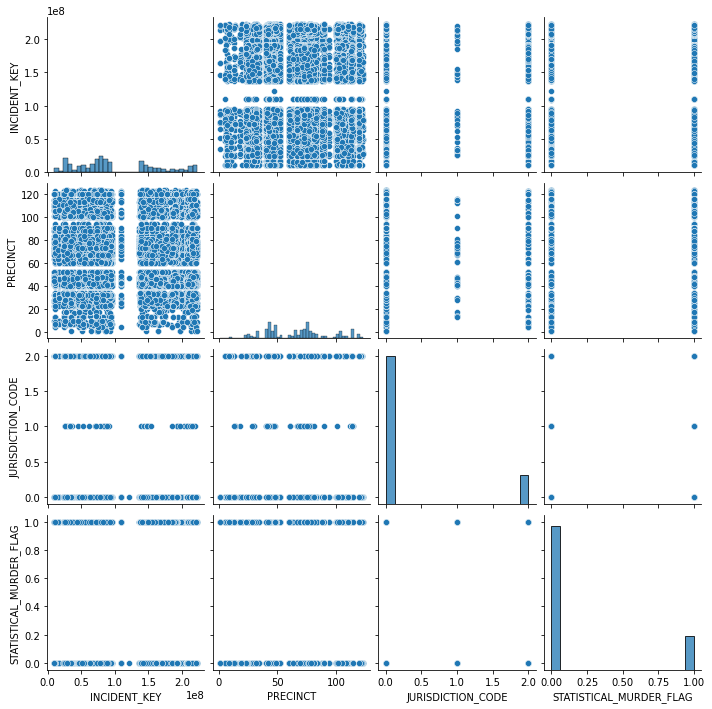

In [15]:
sns.pairplot(df)

I did a sns.pairplot graphing by adding "BORO" as a hue. It gives a comparison between each variable for each Race. You can see in the Y and X axis has the same lined of variables. The colors shows the different "BORO" differntiated in different colors that is listed on the right side.

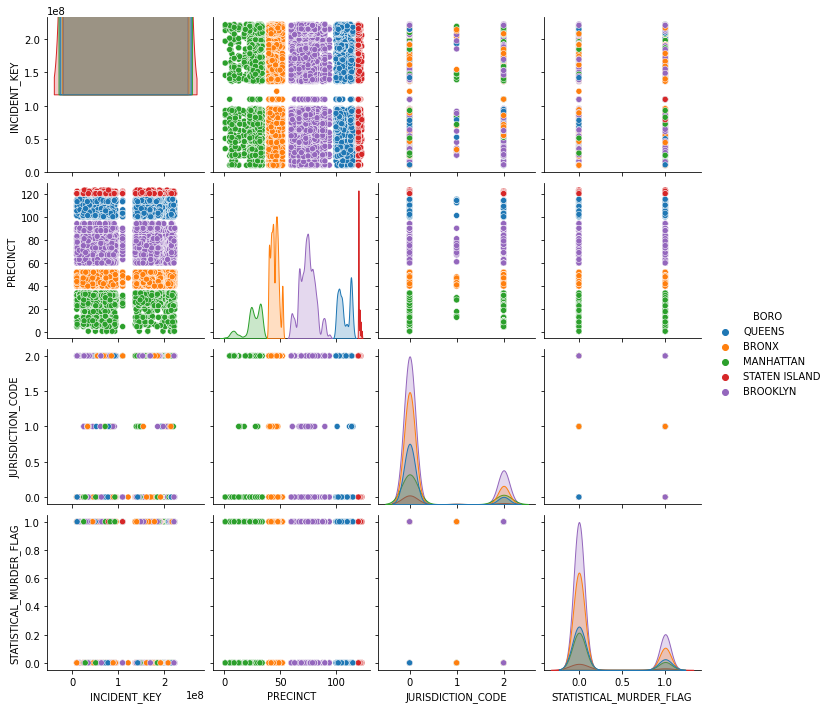

In [16]:
sns.pairplot(df,hue='BORO')

I did a df._get_numeric_data() to see which columns contain numeric data. 

In [17]:
df._get_numeric_data()


INCIDENT_KEY  PRECINCT  JURISDICTION_CODE  STATISTICAL_MURDER_FLAG
0         201575314       103                0.0                    False
1         205748546        40                0.0                    False
2         193118596        23                0.0                    False
3         204192600       121                0.0                     True
4         201483468        46                0.0                    False
...             ...       ...                ...                      ...
23563     216936948        48                0.0                     True
23564     214926175       102                0.0                    False
23565     220870730        60                0.0                     True
23566     208187330        42                2.0                    False
23567     220848244        79                2.0                    False

[23568 rows x 4 columns]

I did a df.info(). This function is used to print a concise summary of a DataFrame. This method prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage. I also could of done it individually by df.count and df.type. 

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23568 entries, 0 to 23567
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   INCIDENT_KEY             23568 non-null  int64  
 1   OCCUR_DATE               23568 non-null  object 
 2   OCCUR_TIME               23568 non-null  object 
 3   BORO                     23568 non-null  object 
 4   PRECINCT                 23568 non-null  int64  
 5   JURISDICTION_CODE        23566 non-null  float64
 6   LOCATION_DESC            23568 non-null  object 
 7   STATISTICAL_MURDER_FLAG  23568 non-null  bool   
 8   PERP_AGE_GROUP           23568 non-null  object 
 9   PERP_SEX                 23568 non-null  object 
 10  PERP_RACE                23568 non-null  object 
 11  VIC_AGE_GROUP            23568 non-null  object 
 12  VIC_SEX                  23568 non-null  object 
 13  VIC_RACE                 23568 non-null  object 
dtypes: bool(1), float64(1)

I did a df.describe. 

In [19]:
df.describe()

INCIDENT_KEY      PRECINCT  JURISDICTION_CODE
count  2.356800e+04  23568.000000       23566.000000
mean   1.022186e+08     66.211049           0.332258
std    6.077246e+07     27.121316           0.742868
min    9.953245e+06      1.000000           0.000000
25%    5.531701e+07     44.000000           0.000000
50%    8.336537e+07     69.000000           0.000000
75%    1.507724e+08     81.000000           0.000000
max    2.224733e+08    123.000000           2.000000

I wanted to find out what year this report begins and to what year it ends. 

In [20]:
df['OCCUR_DATE'].min()

'1/1/2006'

In [21]:
df['OCCUR_DATE'].max()

'9/9/2020'

Wanted to see the median for the Jurisdiction Code. 

In [22]:
df['JURISDICTION_CODE'].median()

0.0

I did an average amount of shooting incident by Borough.

In [23]:
df.groupby(['BORO'])['INCIDENT_KEY'].mean()


BORO
BRONX            1.023062e+08
BROOKLYN         1.011106e+08
MANHATTAN        1.034994e+08
QUEENS           1.035350e+08
STATEN ISLAND    1.047988e+08
Name: INCIDENT_KEY, dtype: float64

I wanted an analysis of how many shooting incident occured by year. So I got the year by itself to do a groupby. 2006 had the most shooting incident and 2018 had the least. I also did a Bar Graph.

In [24]:
df['OCCUR_DATE'] = pd.to_datetime(df['OCCUR_DATE'] + ' ' + df['OCCUR_TIME'])

In [25]:
(df['OCCUR_DATE'].dt.year).unique()

array([2019, 2012, 2011, 2016, 2010, 2015, 2008, 2006, 2007, 2013, 2018,
       2009, 2014, 2017, 2020])

In [26]:
df.groupby(df['OCCUR_DATE'].dt.year)['INCIDENT_KEY'].count()

OCCUR_DATE
2006    2055
2007    1887
2008    1958
2009    1828
2010    1910
2011    1939
2012    1717
2013    1339
2014    1464
2015    1434
2016    1208
2017     969
2018     951
2019     967
2020    1942
Name: INCIDENT_KEY, dtype: int64

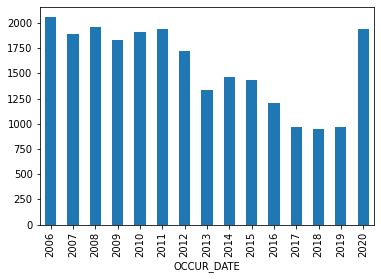

In [27]:
df.groupby(df['OCCUR_DATE'].dt.year)['INCIDENT_KEY'].count().plot(kind='bar')

I did an analysis of the most shooting incident by Borough and Brooklyn had the most with 9722 and Staten Island had the least with 698. I also did a graph. 

In [28]:
df.groupby(['BORO'])['INCIDENT_KEY'].count()

BORO
BRONX            6700
BROOKLYN         9722
MANHATTAN        2921
QUEENS           3527
STATEN ISLAND     698
Name: INCIDENT_KEY, dtype: int64

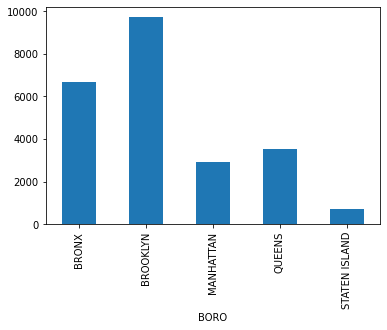

In [29]:
df.groupby(['BORO'])['INCIDENT_KEY'].count().plot(kind='bar')

I did an analysis of how many shooting incident occur by Precinct in each Borough. Brooklyn, Precinct 75 had the most with 1367. Manhattan had the least at Precinct 22 with 1 shooting. I also did a graph. Click 2 more times to see graph larger. 

In [30]:
pd.set_option('display.max_rows', None)
df.groupby(['BORO', 'PRECINCT'])['INCIDENT_KEY'].count()

BORO           PRECINCT
BRONX          40           759
               41           417
               42           725
               43           657
               44           842
               45           148
               46           779
               47           815
               48           639
               49           296
               50           126
               52           497
BROOKLYN       60           320
               61           130
               62            61
               63           251
               66            41
               67          1102
               68            27
               69           404
               70           427
               71           526
               72            91
               73          1282
               75          1367
               76           145
               77           700
               78            54
               79           920
               81           722
               8

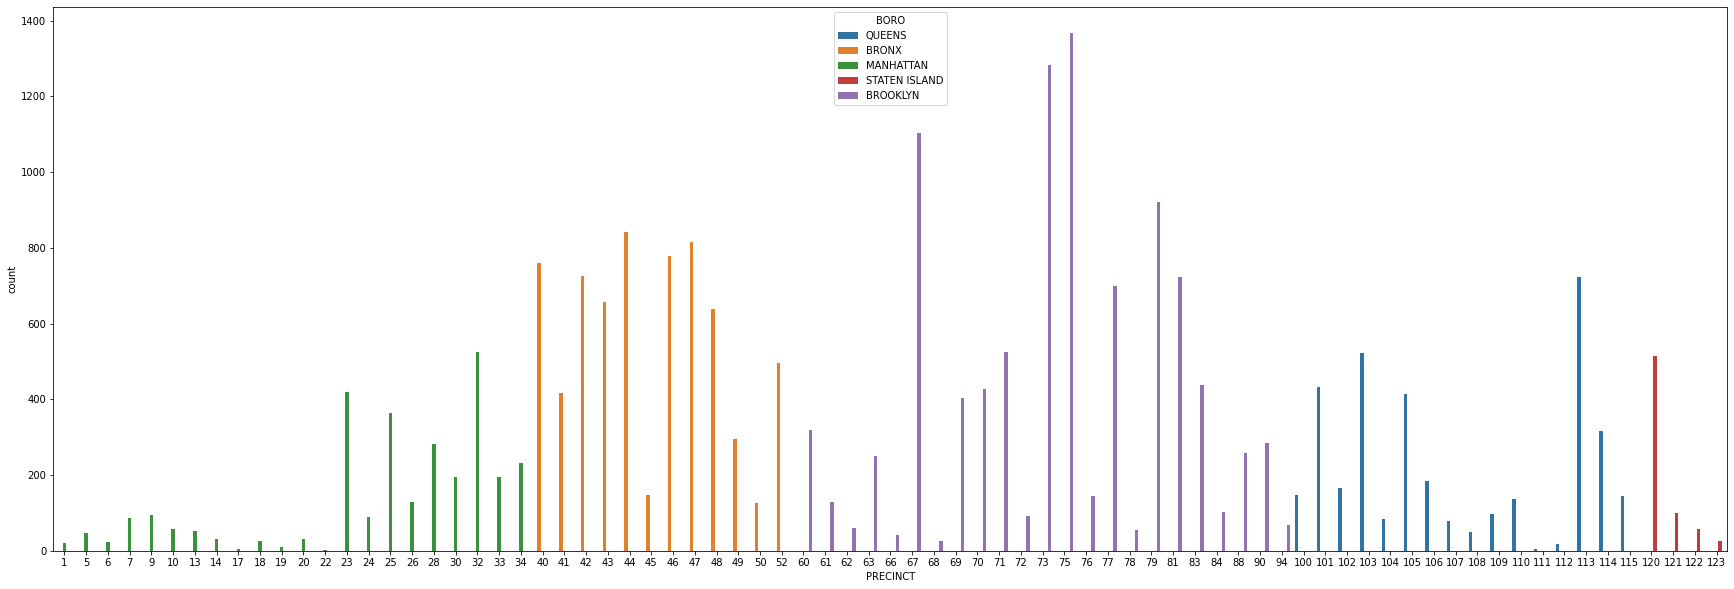

In [60]:
sns.countplot(x="PRECINCT", hue="BORO", data=df)
plt.rcParams["figure.figsize"] = (30,10)

I did an analysis most by jurisdiction code.

FYI: JURISDICTION_CODE is Jurisdiction where the shooting incident occurred. Jurisdiction codes 0(Patrol), 1(Transit) and 2(Housing) represent NYPD whilst codes 3 and more represent non NYPD jurisdictions.

Most shooting occur while in patrol with 19624 and the least occur in transit with 54. 

I also did a graph. 

In [32]:
df.groupby(['JURISDICTION_CODE'])['INCIDENT_KEY'].count()

JURISDICTION_CODE
0.0    19624
1.0       54
2.0     3888
Name: INCIDENT_KEY, dtype: int64

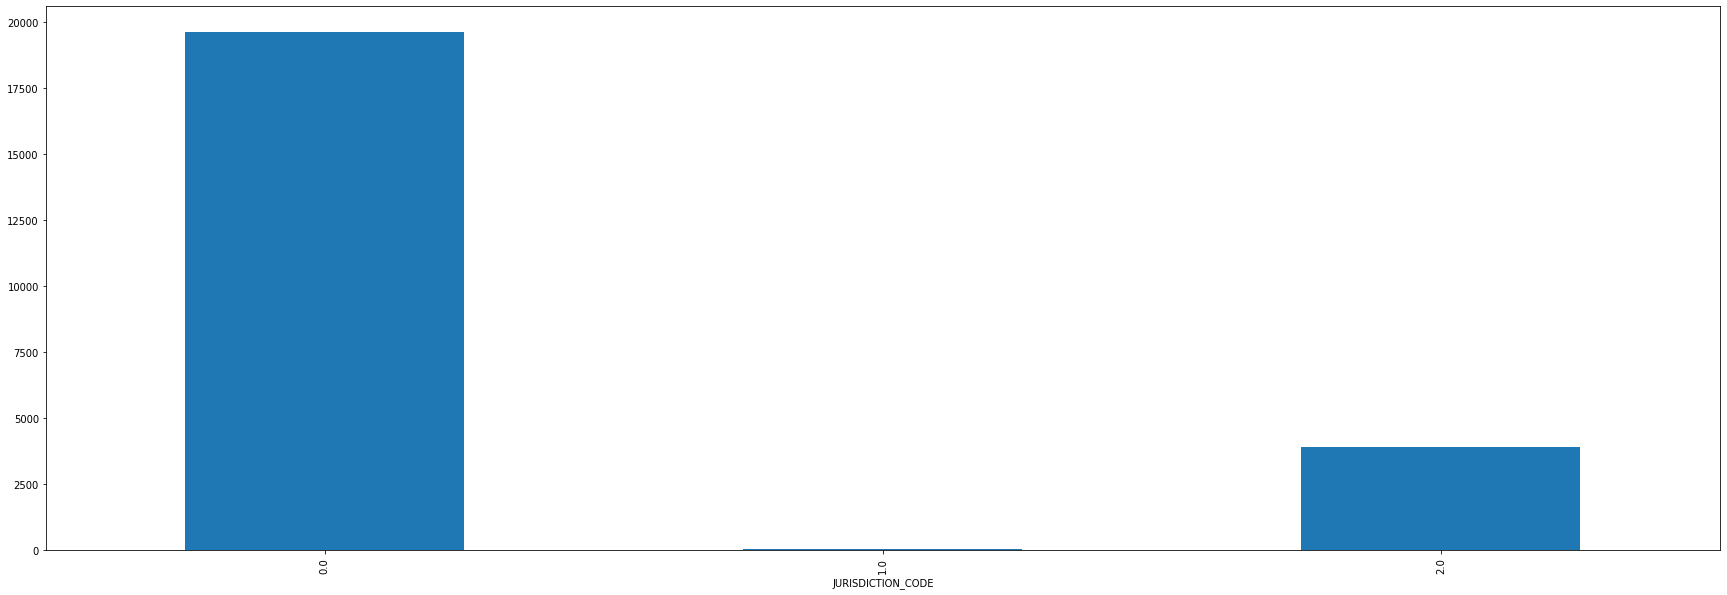

In [33]:
df.groupby(['JURISDICTION_CODE'])['INCIDENT_KEY'].count().plot(kind='bar')
plt.rcParams["figure.figsize"] = (7,5)

I did an analysis if died or survived. 
19080 victim survived and 4488 victim did die. 

STATISTICAL_MURDER_FLAG is Shooting resulted in the victim’s death which would be counted as a murder.

I also did a graph. 

In [34]:
df.groupby(['STATISTICAL_MURDER_FLAG'])['INCIDENT_KEY'].count()

STATISTICAL_MURDER_FLAG
False    19080
True      4488
Name: INCIDENT_KEY, dtype: int64

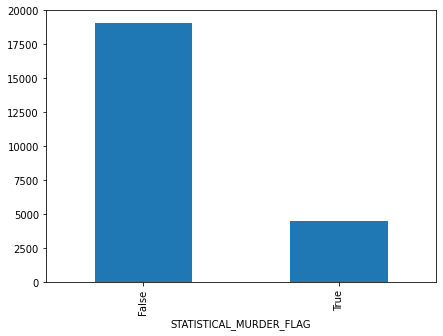

In [35]:
df.groupby(['STATISTICAL_MURDER_FLAG'])['INCIDENT_KEY'].count().plot(kind='bar')
plt.rcParams["figure.figsize"] = (7,5)

I did an analysis of the most shooting incident perpretator age which was unknown age with 11618 and the least was 65+ with 54. I also did a graph. 

In [36]:
df.groupby(['PERP_AGE_GROUP'])['INCIDENT_KEY'].count()

PERP_AGE_GROUP
18-24       5448
25-44       4613
45-64        481
65+           54
<18         1354
UNKNOWN    11618
Name: INCIDENT_KEY, dtype: int64

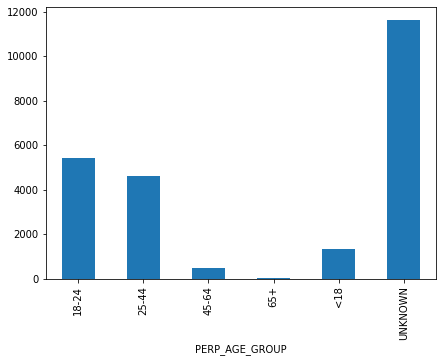

In [37]:
df.groupby(['PERP_AGE_GROUP'])['INCIDENT_KEY'].count().plot(kind='bar')

I did an analysis of the most shooting incident victim age was 25-44 age with 10287 and the least was unknown with 65. I also did a graph.

In [38]:
df.groupby(['VIC_AGE_GROUP'])['INCIDENT_KEY'].count()

VIC_AGE_GROUP
18-24       9000
25-44      10287
45-64       1536
65+          155
<18         2525
UNKNOWN       65
Name: INCIDENT_KEY, dtype: int64

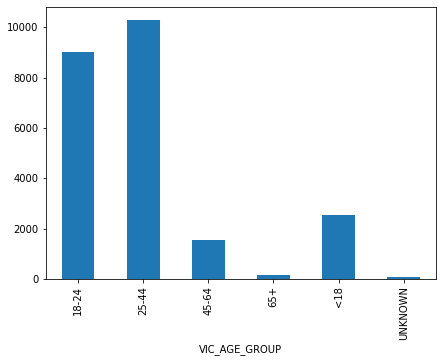

In [39]:
df.groupby(['VIC_AGE_GROUP'])['INCIDENT_KEY'].count().plot(kind='bar')

I did an analysis of a count of shooting incident by borough, perpetrator age, race and sex. 

Brooklyn had the most with unknown information regarding the perpetrator with 4606. I try doing a graph. Wording was to close to each other because it was too much information. Click 2 times to see it larger. 

In [40]:
pd.set_option('display.max_rows', None)
df.groupby(['BORO', 'PERP_AGE_GROUP', 'PERP_RACE', 'PERP_SEX'])['INCIDENT_KEY'].count()




BORO           PERP_AGE_GROUP  PERP_RACE                       PERP_SEX
BRONX          18-24           AMERICAN INDIAN/ALASKAN NATIVE  F              1
                               ASIAN / PACIFIC ISLANDER        M              4
                               BLACK                           F             13
                                                               M            966
                                                               UNKNOWN        2
                               BLACK HISPANIC                  F              4
                                                               M            243
                               UNKNOWN                         M             19
                                                               UNKNOWN        2
                               WHITE                           F              1
                                                               M              8
                               WHITE HISPANIC   

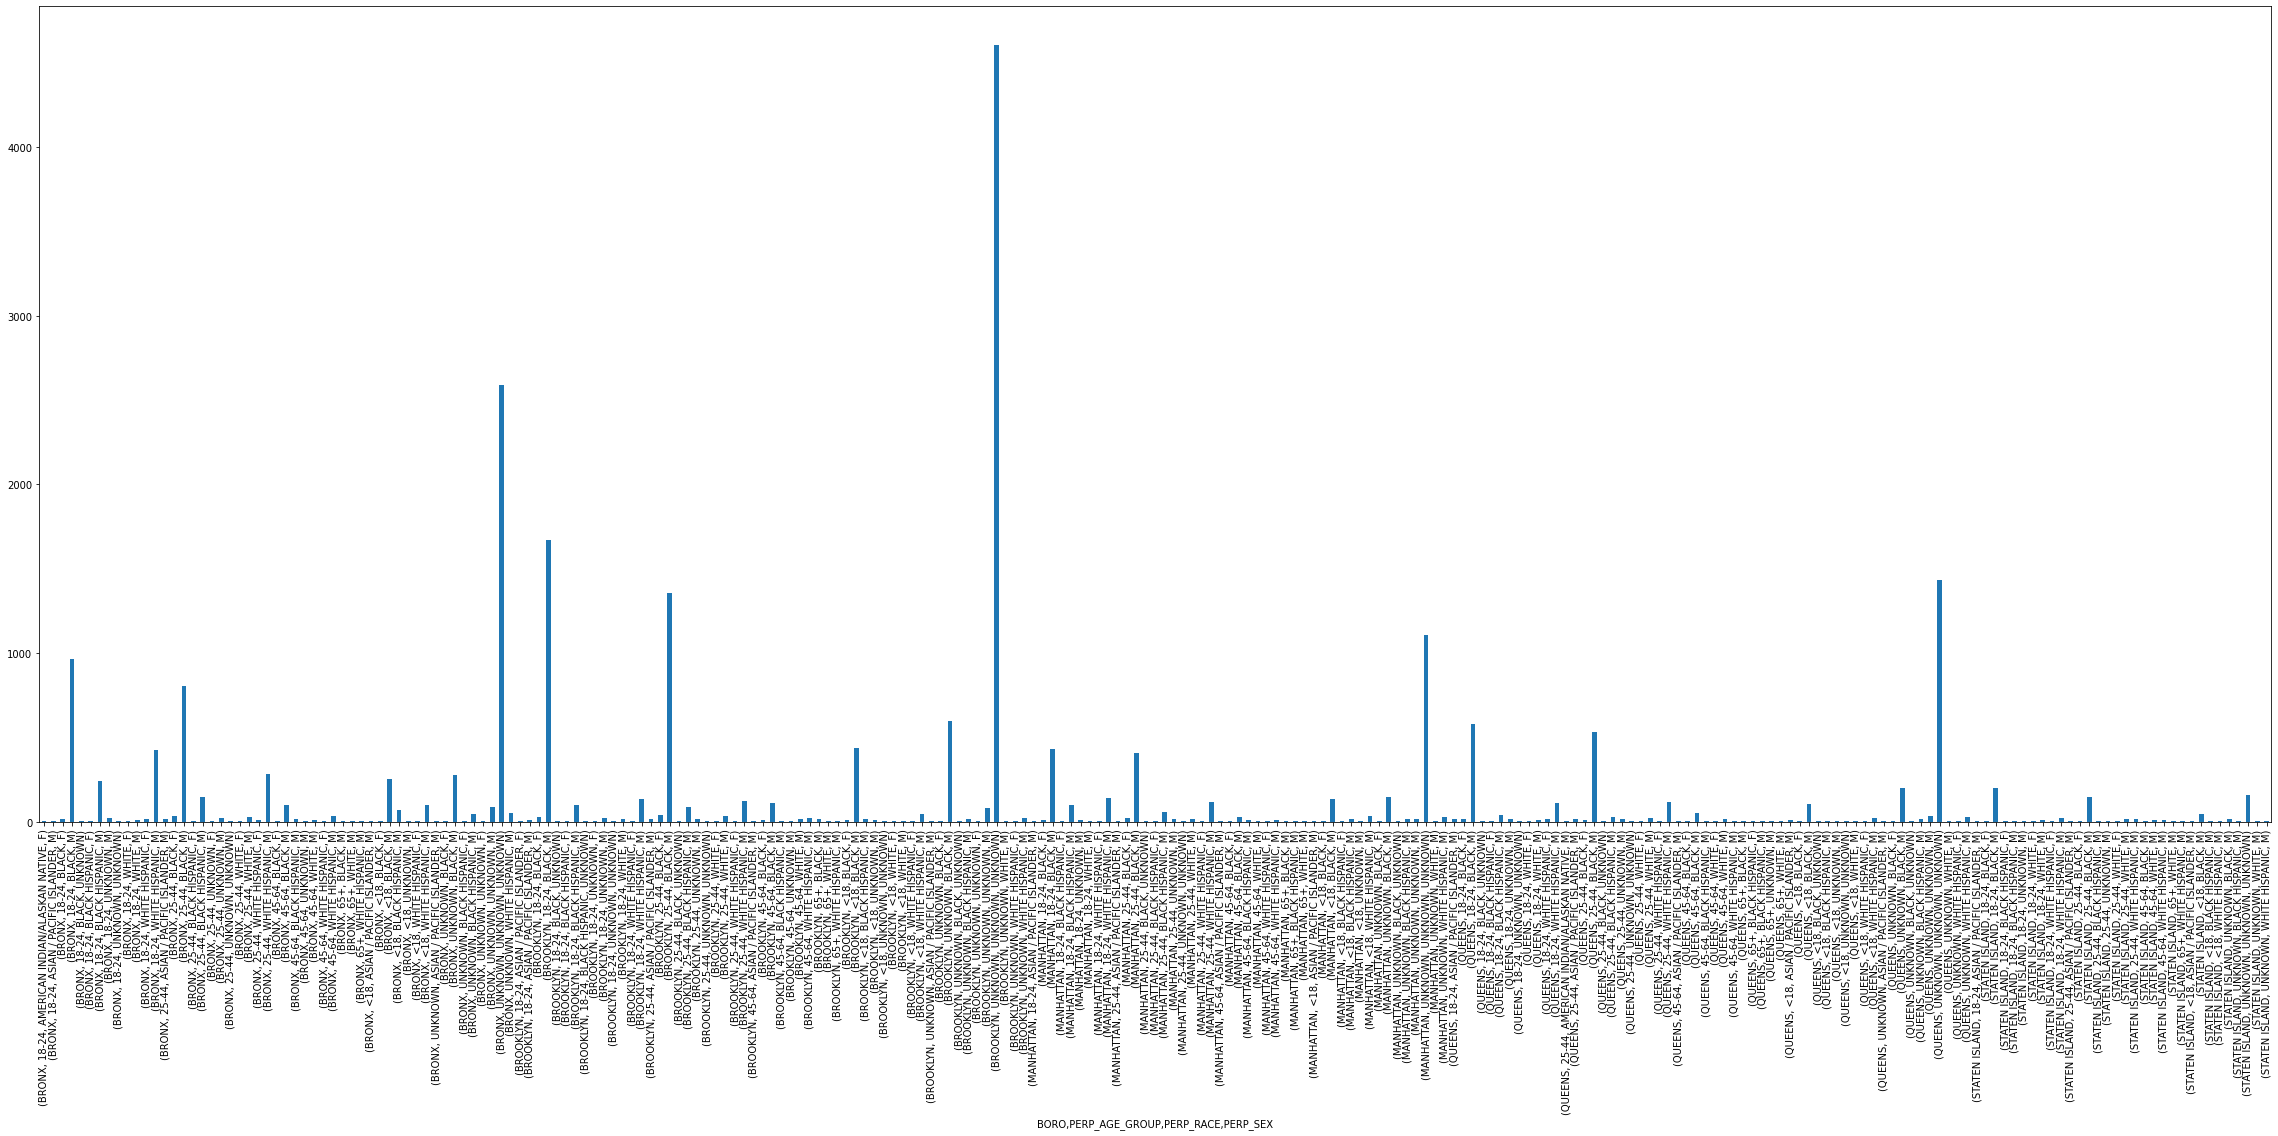

In [67]:
df.groupby(['BORO', 'PERP_AGE_GROUP', 'PERP_RACE', 'PERP_SEX']).count()['INCIDENT_KEY'].plot(kind='bar')
plt.rcParams["figure.figsize"] = (40,15)

I did an analysis of how many shooting incident done by Perpetrator by age group, sex, race in each boro individually. I also did a graph for each analysis. 

We had the most shooting incident of 5341 in Brooklyn, unknown age of the Perpetrator. The least was 6 shootings by age 65+ in the Bronx and Staten Island. 

In [42]:
df.groupby(['BORO', 'PERP_AGE_GROUP'])['INCIDENT_KEY'].count()

BORO           PERP_AGE_GROUP
BRONX          18-24             1701
               25-44             1345
               45-64              159
               65+                  6
               <18                433
               UNKNOWN           3056
BROOKLYN       18-24             1997
               25-44             1676
               45-64              161
               65+                 23
               <18                524
               UNKNOWN           5341
MANHATTAN      18-24              695
               25-44              644
               45-64               54
               65+                  7
               <18                197
               UNKNOWN           1324
QUEENS         18-24              808
               25-44              753
               45-64               84
               65+                 12
               <18                150
               UNKNOWN           1720
STATEN ISLAND  18-24              247
               25-44

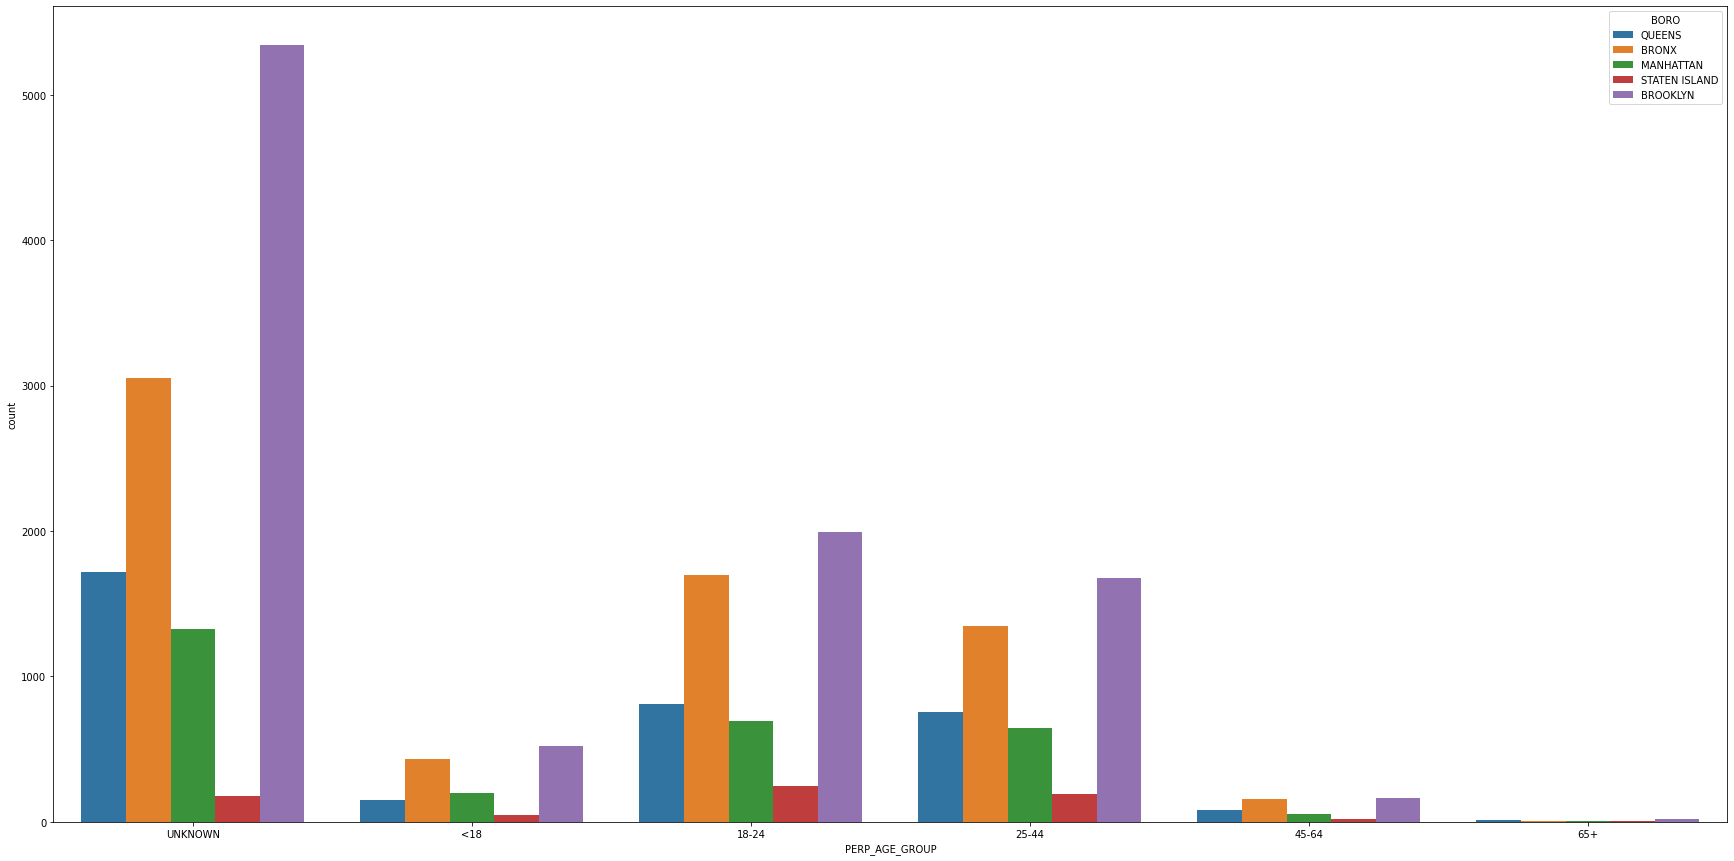

In [43]:
sns.countplot(x="PERP_AGE_GROUP", hue="BORO", data=df)

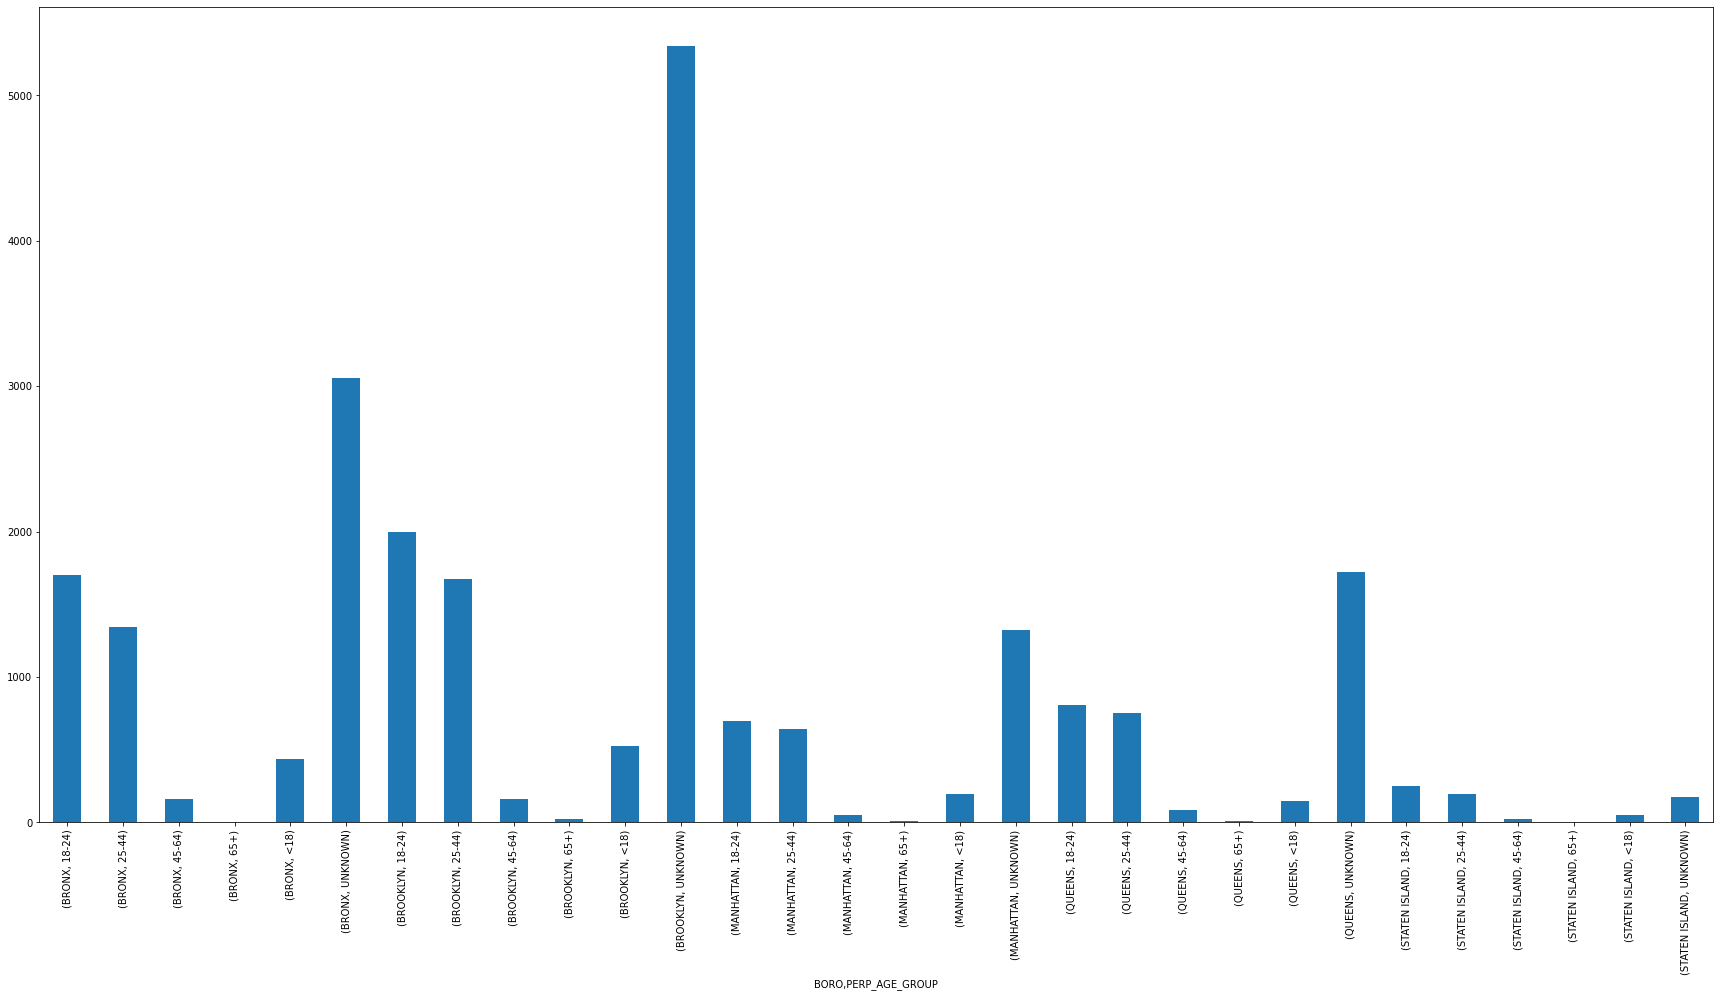

In [44]:
df.groupby(['BORO', 'PERP_AGE_GROUP'])['INCIDENT_KEY'].count().plot(kind='bar')
plt.rcParams["figure.figsize"] = (15,5)

We had the most shooting incident of 4990 in Brooklyn by male Perpetrator. The least was 12 in Staten Island by female. 

In [45]:
df.groupby(['BORO','PERP_SEX'])['INCIDENT_KEY'].count()

BORO           PERP_SEX
BRONX          F             95
               M           4011
               UNKNOWN     2594
BROOKLYN       F            110
               M           4990
               UNKNOWN     4622
MANHATTAN      F             51
               M           1758
               UNKNOWN     1112
QUEENS         F             66
               M           2018
               UNKNOWN     1443
STATEN ISLAND  F             12
               M            528
               UNKNOWN      158
Name: INCIDENT_KEY, dtype: int64

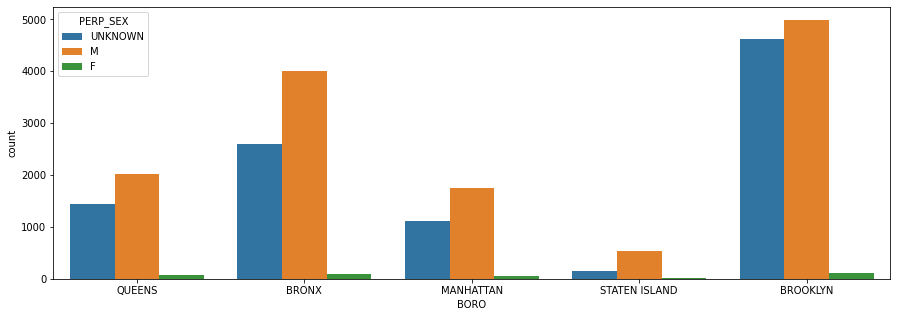

In [46]:
sns.countplot(x="BORO", hue="PERP_SEX", data=df)

We had the most shooting incident of 4741 in Brooklyn by perpetrator with unknown race. The least was 1 in the Bronx and 1 in Queens by an American Indian/Alasken Native. 

In [47]:
df.groupby(['BORO','PERP_RACE'])['INCIDENT_KEY'].count()

BORO           PERP_RACE                     
BRONX          AMERICAN INDIAN/ALASKAN NATIVE       1
               ASIAN / PACIFIC ISLANDER            27
               BLACK                             2452
               BLACK HISPANIC                     525
               UNKNOWN                           2731
               WHITE                               47
               WHITE HISPANIC                     917
BROOKLYN       ASIAN / PACIFIC ISLANDER            33
               BLACK                             4280
               BLACK HISPANIC                     231
               UNKNOWN                           4741
               WHITE                               78
               WHITE HISPANIC                     359
MANHATTAN      ASIAN / PACIFIC ISLANDER             8
               BLACK                             1193
               BLACK HISPANIC                     211
               UNKNOWN                           1153
               WHITE                

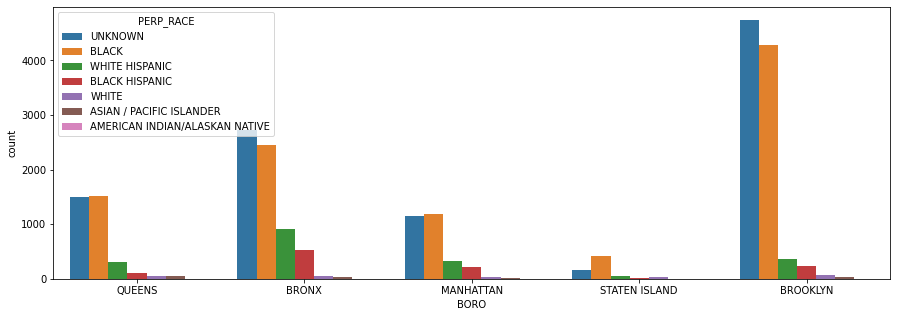

In [48]:
sns.countplot(x="BORO", hue="PERP_RACE", data=df)

I did an analysis of a count of shooting incident by borough, victim age, race and sex. 

We had Brooklyn with 4606 victim being Male, Black, and group age 25-44. I tried doing a graph. Wording was to close to each other because it was too much information.

In [49]:
pd.set_option('display.max_rows', None)
df.groupby(['BORO', 'VIC_AGE_GROUP', 'VIC_SEX', 'VIC_RACE'])['INCIDENT_KEY'].count()

BORO           VIC_AGE_GROUP  VIC_SEX  VIC_RACE                      
BRONX          18-24          F        BLACK                              109
                                       BLACK HISPANIC                      27
                                       WHITE                                8
                                       WHITE HISPANIC                      46
                              M        AMERICAN INDIAN/ALASKAN NATIVE       2
                                       ASIAN / PACIFIC ISLANDER            18
                                       BLACK                             1469
                                       BLACK HISPANIC                     392
                                       UNKNOWN                              9
                                       WHITE                               21
                                       WHITE HISPANIC                     568
                              UNKNOWN  BLACK                            

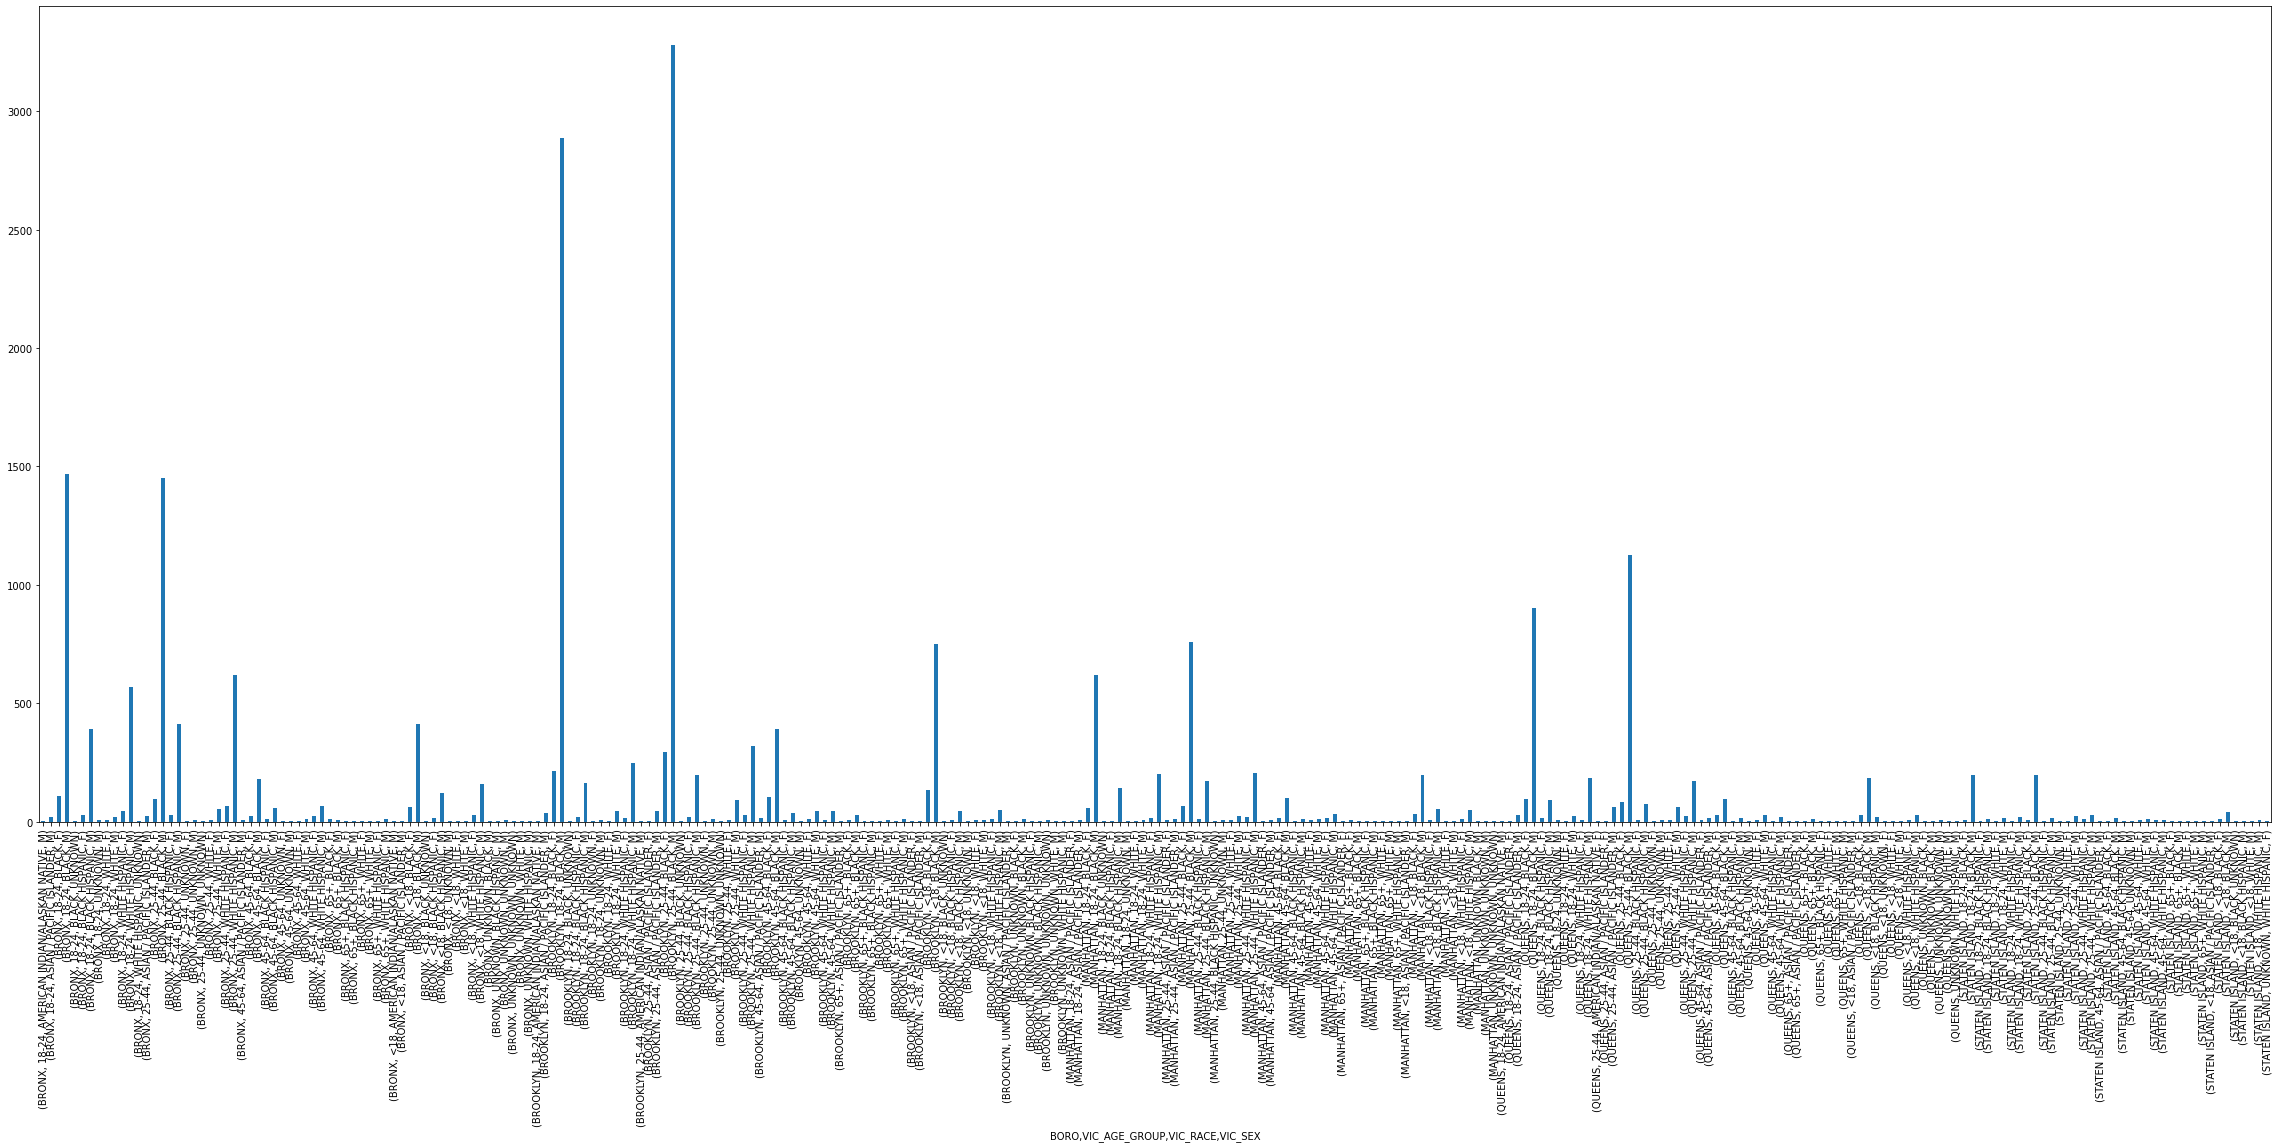

In [69]:
df.groupby(['BORO', 'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX']).count()['INCIDENT_KEY'].plot(kind='bar')
plt.rcParams["figure.figsize"] = (40,15)

I also did an analysis of a the shooting incident count of victims by age group, sex, race in each boro individually. I also did a graph for each analysis.

Brooklyn had the most victim by age group 25-44 in 4305 and least 1 unknown age in Staten Island.  

In [51]:
df.groupby(['BORO', 'VIC_AGE_GROUP'])['INCIDENT_KEY'].count()

BORO           VIC_AGE_GROUP
BRONX          18-24            2671
               25-44            2770
               45-64             395
               65+                39
               <18               806
               UNKNOWN            19
BROOKLYN       18-24            3642
               25-44            4305
               45-64             666
               65+                66
               <18              1014
               UNKNOWN            29
MANHATTAN      18-24            1063
               25-44            1293
               45-64             192
               65+                17
               <18               351
               UNKNOWN             5
QUEENS         18-24            1361
               25-44            1625
               45-64             223
               65+                24
               <18               283
               UNKNOWN            11
STATEN ISLAND  18-24             263
               25-44             294
         

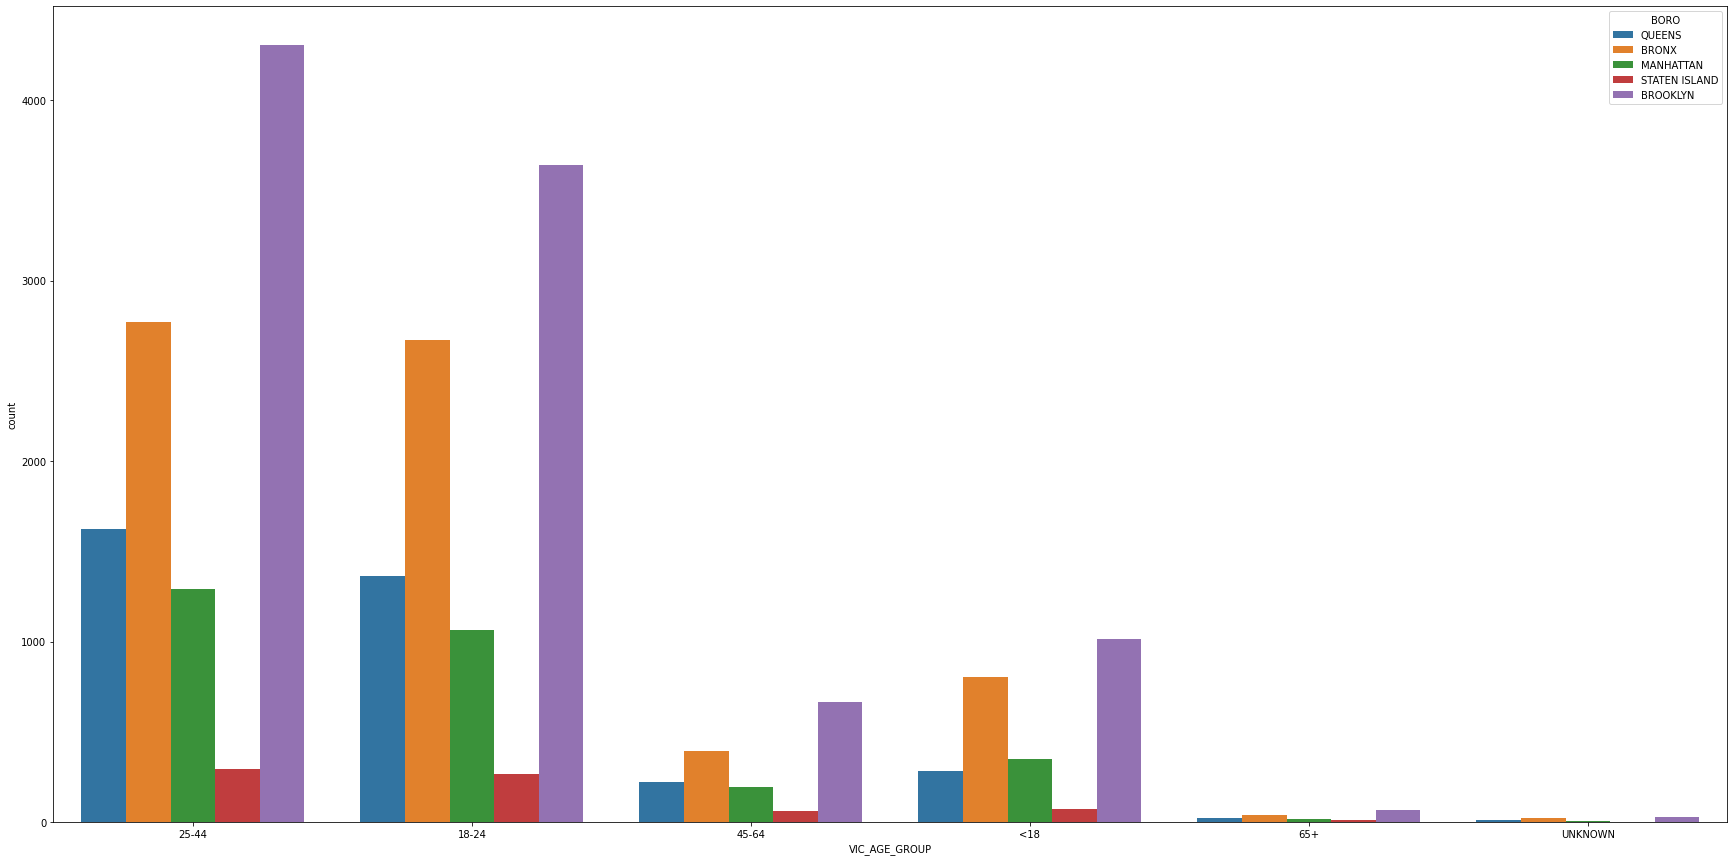

In [52]:
sns.countplot(x="VIC_AGE_GROUP", hue="BORO", data=df)

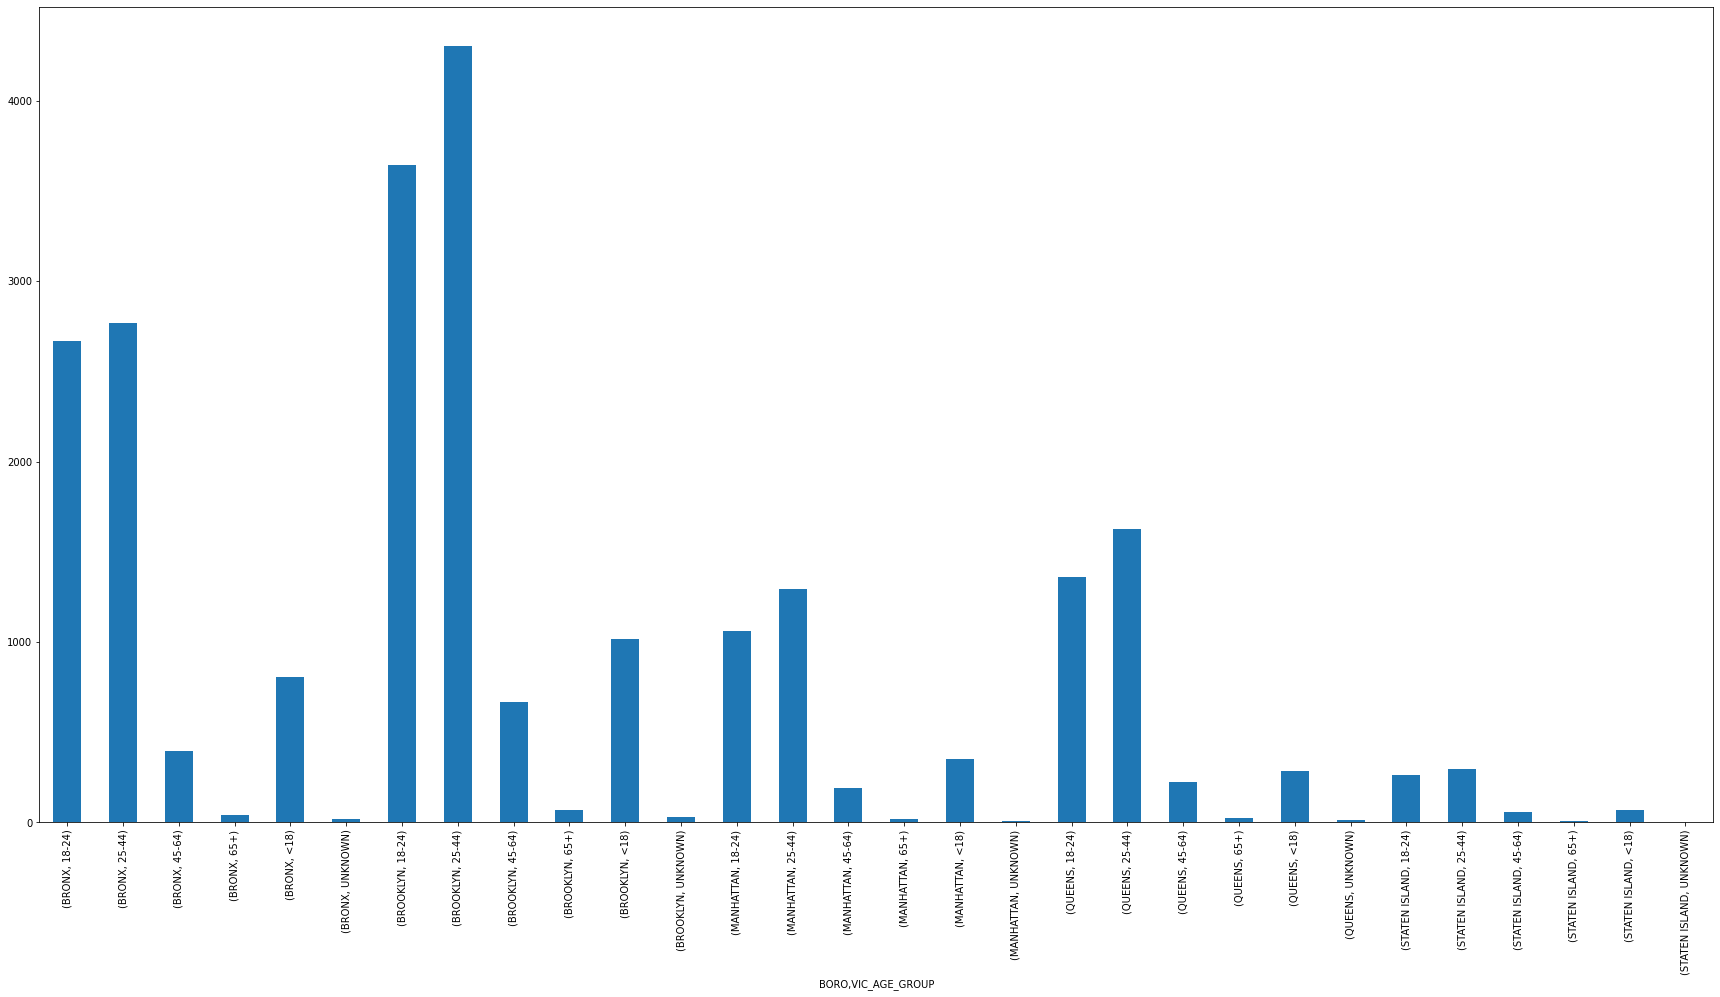

In [53]:
df.groupby(['BORO', 'VIC_AGE_GROUP'])['INCIDENT_KEY'].count().plot(kind='bar')
plt.rcParams["figure.figsize"] = (15,5)

Brooklyn had the most victim being male with 8799 . The least was 1 unknown sex from Staten Island. 

In [54]:
df.groupby(['BORO', 'VIC_SEX'])['INCIDENT_KEY'].count()

BORO           VIC_SEX
BRONX          F           575
               M          6120
               UNKNOWN       5
BROOKLYN       F           913
               M          8799
               UNKNOWN      10
MANHATTAN      F           280
               M          2637
               UNKNOWN       4
QUEENS         F           350
               M          3177
STATEN ISLAND  F            77
               M           620
               UNKNOWN       1
Name: INCIDENT_KEY, dtype: int64

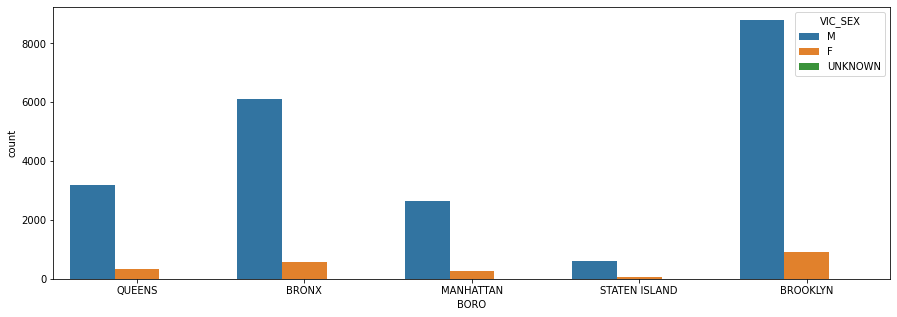

In [55]:
sns.countplot(x="BORO", hue="VIC_SEX", data=df)

Brooklyn had the most victim with race being Black with 8108. The least was 2 unknown from Staten Island and 2 American Indian/Alaskan Native from Queens. 

In [56]:
df.groupby(['BORO', 'VIC_RACE'])['INCIDENT_KEY'].count()

BORO           VIC_RACE                      
BRONX          AMERICAN INDIAN/ALASKAN NATIVE       4
               ASIAN / PACIFIC ISLANDER            52
               BLACK                             3829
               BLACK HISPANIC                    1073
               UNKNOWN                             30
               WHITE                              115
               WHITE HISPANIC                    1597
BROOKLYN       AMERICAN INDIAN/ALASKAN NATIVE       3
               ASIAN / PACIFIC ISLANDER           107
               BLACK                             8108
               BLACK HISPANIC                     501
               UNKNOWN                             33
               WHITE                              226
               WHITE HISPANIC                     744
MANHATTAN      ASIAN / PACIFIC ISLANDER            36
               BLACK                             1854
               BLACK HISPANIC                     406
               UNKNOWN              

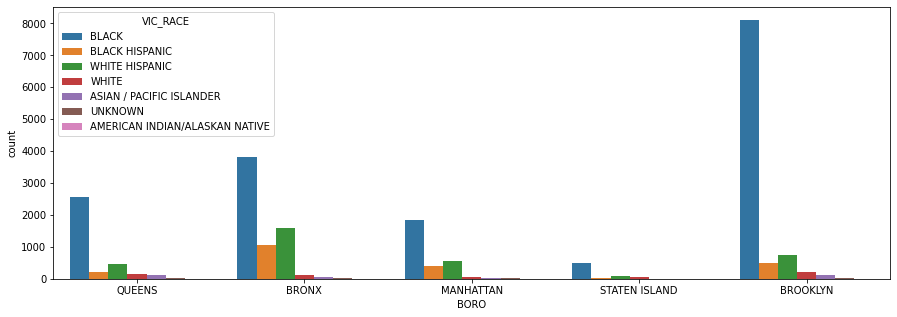

In [57]:
sns.countplot(x="BORO", hue="VIC_RACE", data=df)

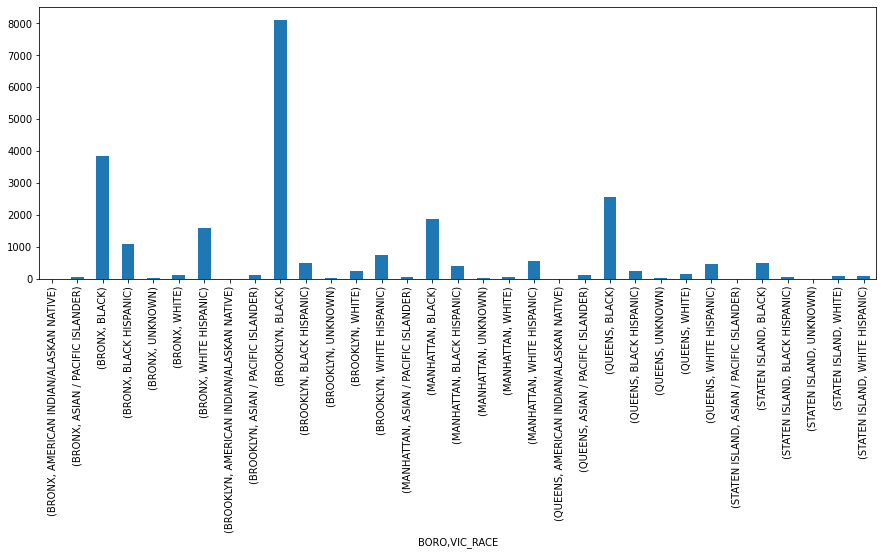

In [58]:
df.groupby(['BORO', 'VIC_RACE'])['INCIDENT_KEY'].count().plot(kind='bar')
plt.rcParams["figure.figsize"] = (15,5)

  This dataset gives NYPD shooting incidents data that occur from January 2006 to September 2020 for each borough and precinct. It lists the perpetrators and victims age, sex, and race. It also tells us where the shooting incident occur and if the victims passed away or survived the shooting. 
  
  As per my analysis in 2006 we had the most shooting incident and 2018 we had the least shooting incident. 

  Brooklyn, 75th Precinct had the most shooting incident and Manhattan, 22nd Precinct had the least. 

  Most shooting incident occur while in patrol while the least was in tranist (NYCT). 
 
  By age, sex, and race, Brooklyn had the most shooting incident where the age was unknown and the Bronx had the least where the perpetrator age was 65+. By sex, Brooklyn again had the most shooting incident where the perpetrators were male and the least were Staten Island where the perpetrators were female. By race, Brooklyn again had the most shooting incident where the perpetrator race was unknown and the Bronx and Queens had the least where the perpetrator were American Indian/Alasken Native. 
  
  In regards to the shooting victims, Brookyn had the most where the victims were male, black, and group age 25-44. Staten Island and Queens had the least where the victim age, sex and race were unknown. 
  
  In total 19080 victim survived, while 4488 victim passed away. 
